# Build a model to predict the price of Cryptocurrency for the next 30 days.





# Objective: -

You must have heard or invested in any cryptocurrency once in your life. It is a digital medium of exchange that is encrypted and decentralized. Many people use cryptocurrencies as a form of investing because it gives great returns even in a short period. Bitcoin, Ethereum, and Binance Coin are among the popular cryptocurrencies today.
Predicting the price of cryptocurrencies is one of the popular case studies in the data science community. The prices of stocks and cryptocurrencies don’t just depend on the number of people who buy or sell them. Today, the change in the prices of these investments also depends on the changes in the financial policies of the government regarding any cryptocurrency. The feelings of people towards a particular cryptocurrency or personality who directly or indirectly endorse a cryptocurrency also result in a huge buying and selling of a particular cryptocurrency, resulting in a change in prices.

The goal of this challenge is to build a machine learning model that predict the price of Cryptocurrency for the next 30 days.

# Dataset: -

The dataset used in this model is publicly available on yfinance python module.

Attribute Information:
 - Daily Deceased 

**Three real-valued features:**

1. Date
2. Date_YMD (Year,Month,Day)
3. Daily Confirmed(Daily death confirmed)

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.
- __AutoTs__ : AutoTS is a time series package for Python designed for rapidly deploying high-accuracy forecasts at scale. There are dozens of forecasting models usable in the sklearn style of . fit() and . predict() . These includes naive, statistical, machine learning, and deep learning models.

In [2]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [3]:
#loading the dataset
try:
    df = pd.read_csv('C:/My Sample Notebook/Notebook Template/Covid19 Deaths Prediction/data/Covid19Dataset.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [4]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

Date    Date_YMD  Daily Confirmed  Daily Deceased
0  30 January 2020  2020-01-30                1               0
1  31 January 2020  2020-01-31                0               0
2  1 February 2020  2020-02-01                0               0
3  2 February 2020  2020-02-02                1               0
4  3 February 2020  2020-02-03                1               0

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

**Why we drop column?**

By analysing the first five rows we found that there is a column named Date, it has the combination of categorical and numerical value which of no use so we will drop it.

In [5]:
df = df.drop(['Date'], axis =1)

Axis are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0) 
and the second running horizontally across columns (axis 1).

#### (axis=1) defines that the column named ('Unnamed: 32') should be dropped from the dataset.

After we read the data, we can look at the data using:

In [6]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 720 rows and 3 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "diagnosis" column which says if the cancer is (M = malignant) or (B = benign). 1 means the cancer is malignant and 0 means the cancer is benign.

In [7]:
df['Daily Deceased'].value_counts()

0       48
491      6
1        6
285      5
120      4
        ..
589      1
1032     1
840      1
882      1
441      1
Name: Daily Deceased, Length: 509, dtype: int64

#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [8]:
df.shape

(720, 3)

#### The df.shape method shows the shape of the dataset. 

We can identify that out of the 569 persons, 357 are labeled as B (benign) and 212 as M (malignant).

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_YMD         720 non-null    object
 1   Daily Confirmed  720 non-null    int64 
 2   Daily Deceased   720 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.0+ KB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [10]:
df.iloc[1]

Date_YMD           2020-01-31
Daily Confirmed             0
Daily Deceased              0
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [11]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [12]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  1
There names are as follows:  ['Date_YMD']


In [13]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [14]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  2
There names are as follows:  ['Daily Confirmed', 'Daily Deceased']


In [15]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [16]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  0
There name are as follow:  []


## Step 2 Insights: -

1) We have total 3 features where 2 of them is integer type and 1 object type. 
2) Dropped "Date" columns.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [17]:
df.describe()

Daily Confirmed  Daily Deceased
count       720.000000      720.000000
mean      52637.915278      675.901389
std       78522.746943      932.895333
min           0.000000        0.000000
25%       10419.250000      159.000000
50%       27383.000000      387.000000
75%       54300.750000      734.750000
max      414280.000000     6139.000000

#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

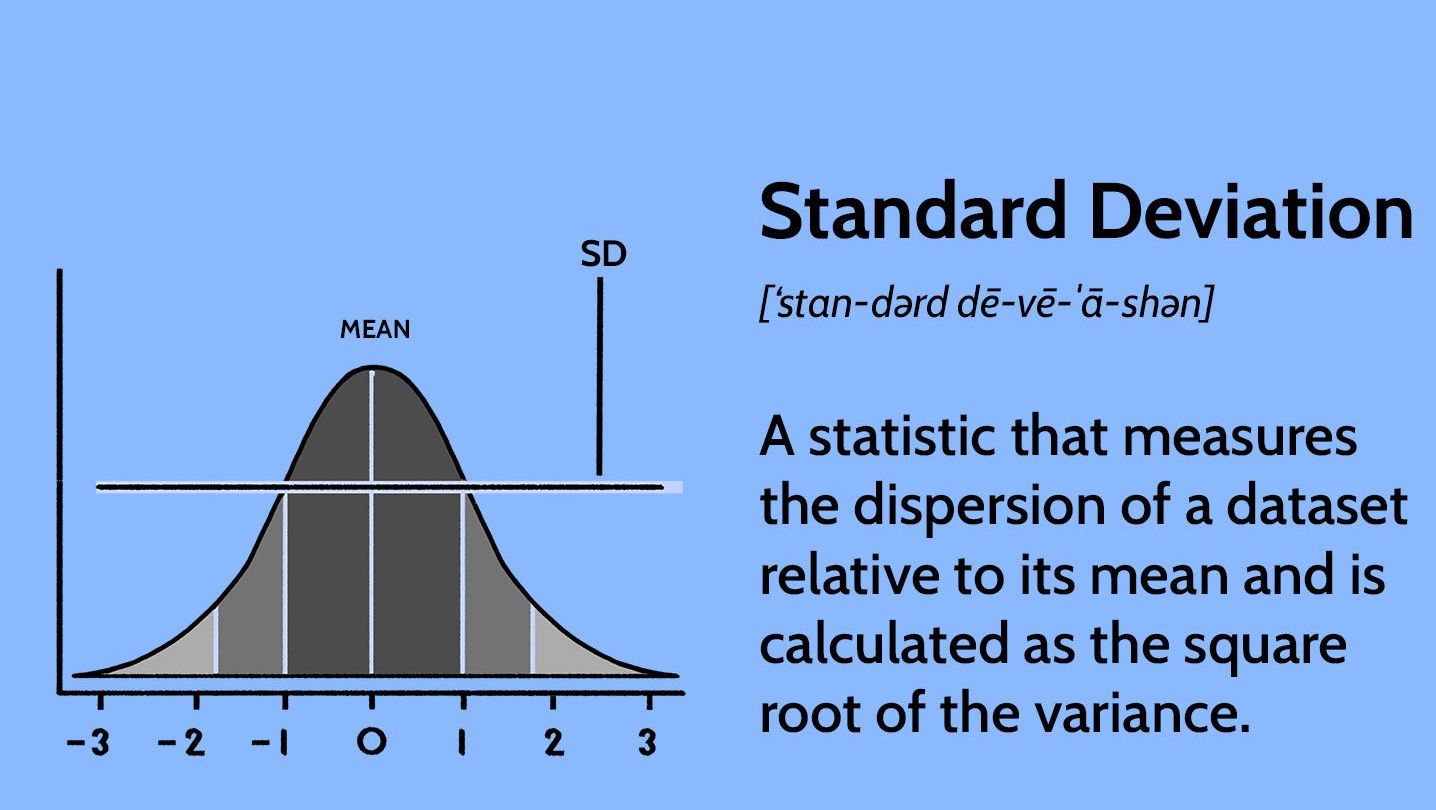

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [18]:
df.std()

Daily Confirmed    78522.746943
Daily Deceased       932.895333
dtype: float64

#### We can also understand the standard deviation using the below function. 

In [19]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [20]:
std_cal(df, float64_lst)

normal_value  zero_value
0             0           0

In [21]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

normal_value  zero_value
0             2           0

zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

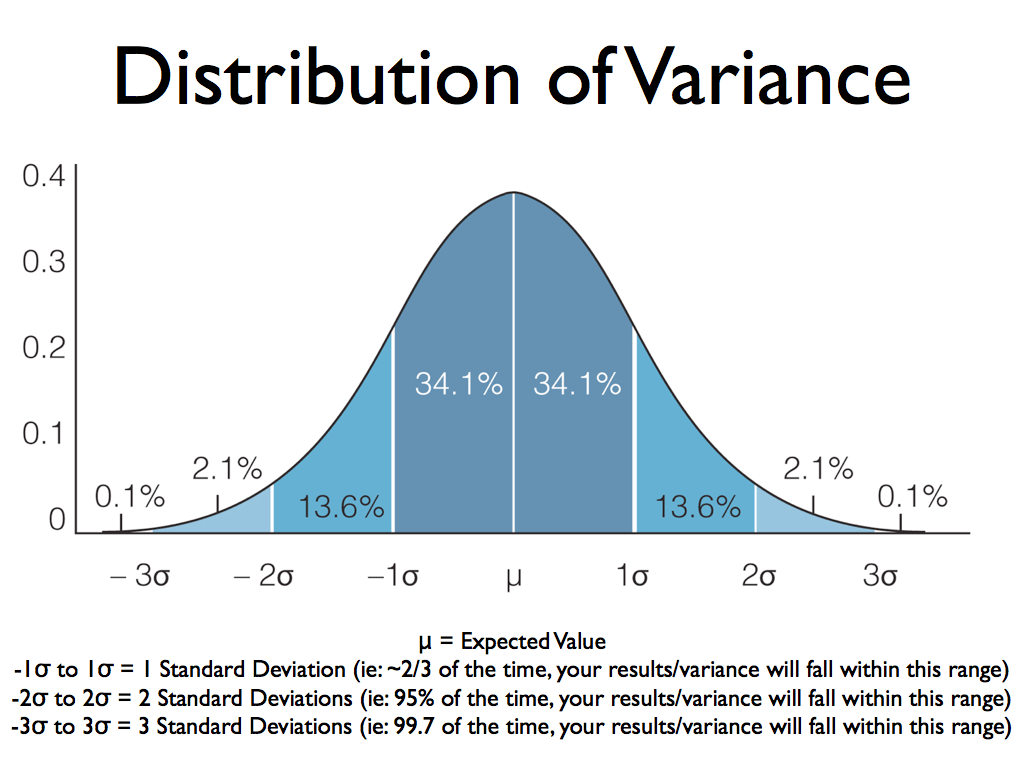

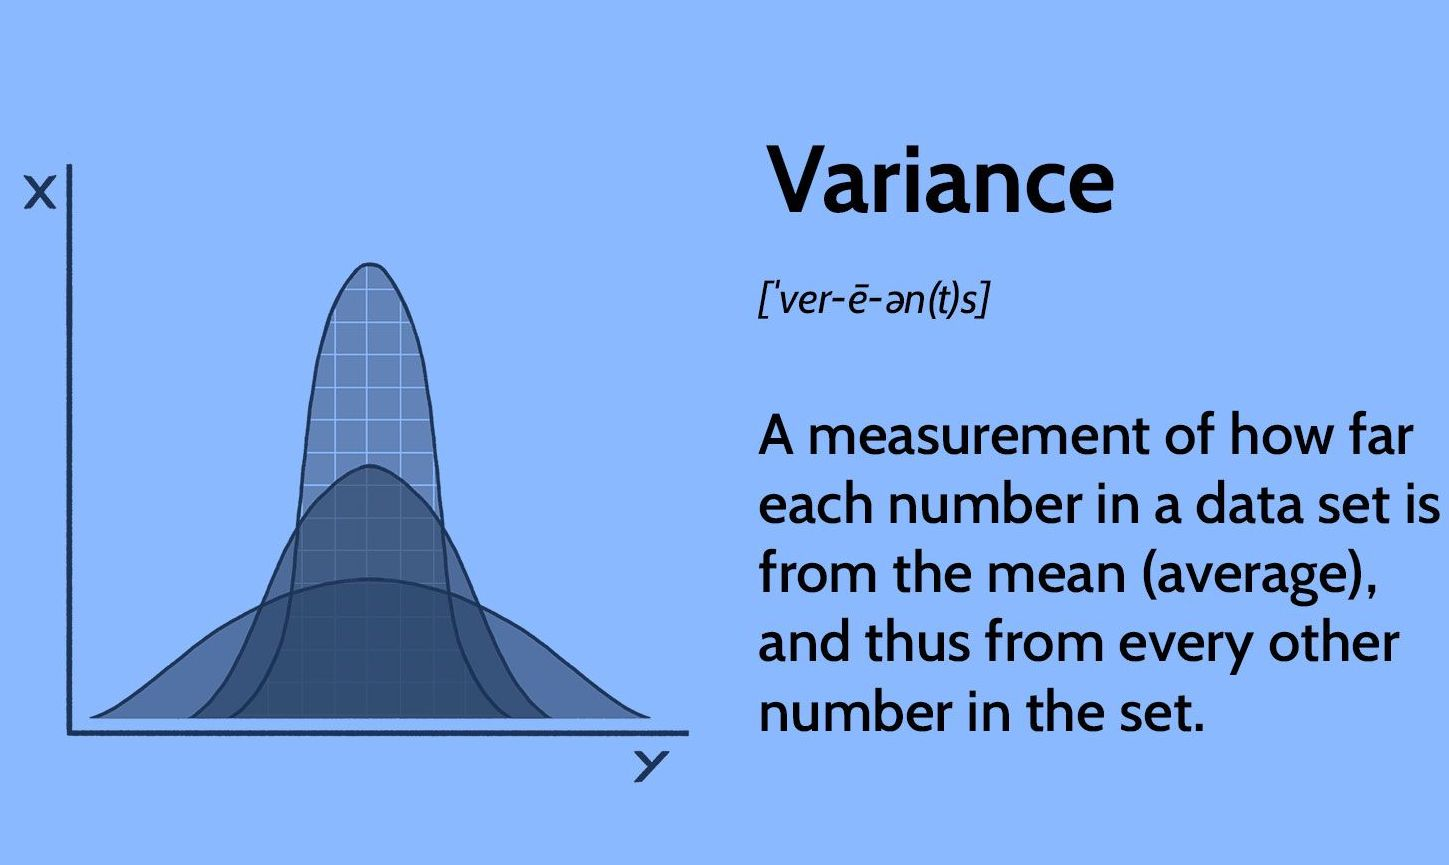

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [22]:
df.var()

Daily Confirmed    6.165822e+09
Daily Deceased     8.702937e+05
dtype: float64

#### We can also understand the Variance using the below function.

In [23]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [24]:
var_cal(df, float64_lst)

normal_value  zero_value
0             0           0

In [25]:
var_cal(df, int64_lst)

normal_value  zero_value
0             2           0

zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

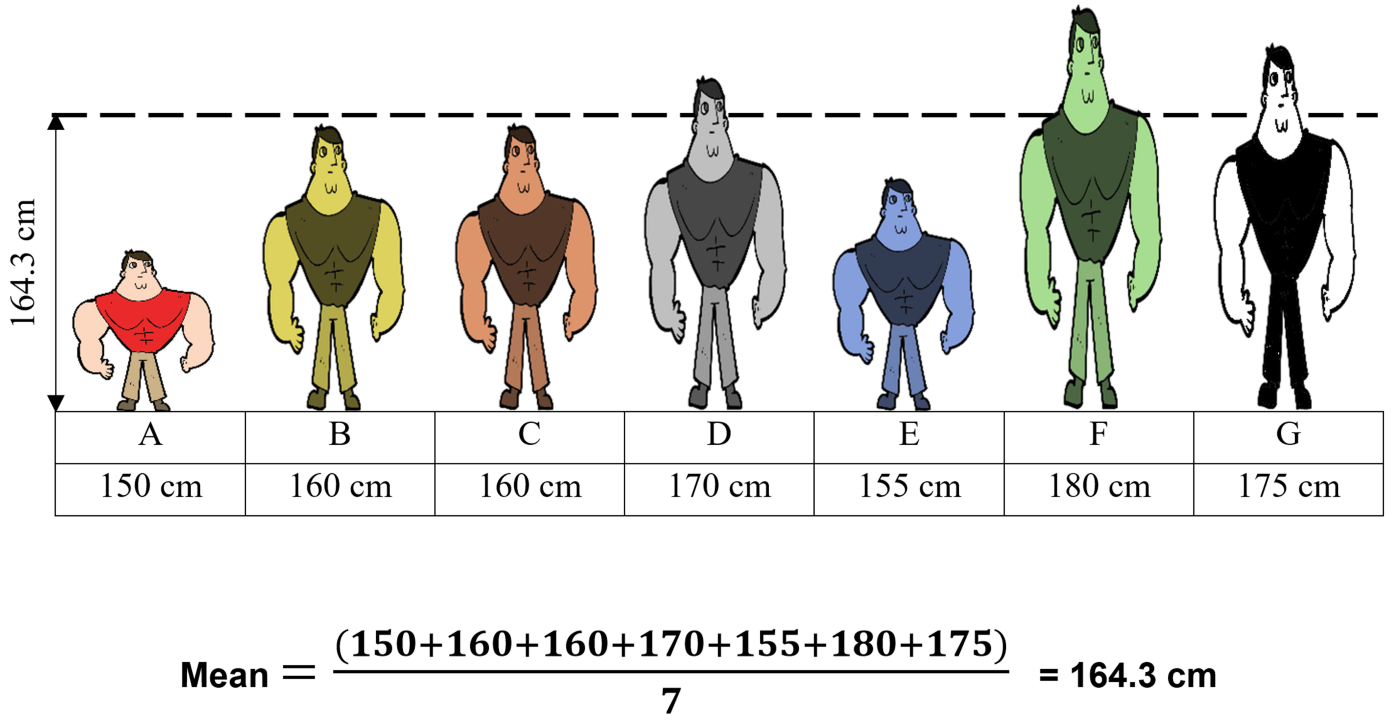

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [26]:
df.mean()

Daily Confirmed    52637.915278
Daily Deceased       675.901389
dtype: float64

#### We can also understand the mean using the below function. 

In [27]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [28]:
mean_cal(df, int64_lst)

normal_value  zero_value
0             2           0

In [29]:
mean_cal(df,float64_lst)

normal_value  zero_value
0             0           0

zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 2.Median
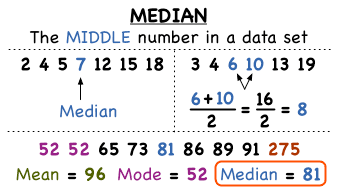

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.The median will depict that the patient below median is Malignent and above that are Benign.

In [30]:
df.median()

Daily Confirmed    27383.0
Daily Deceased       387.0
dtype: float64

####  We can also understand the median using the below function. 

In [31]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [32]:
median_cal(df, float64_lst)

normal_value  zero_value
0             0           0

zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

# 3. Mode
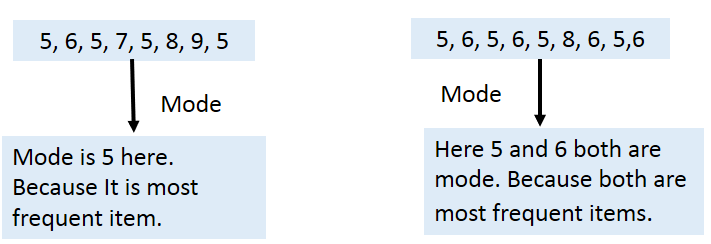
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [33]:
df.mode()

Date_YMD  Daily Confirmed  Daily Deceased
0    2020-01-30              0.0             0.0
1    2020-01-31              NaN             NaN
2    2020-02-01              NaN             NaN
3    2020-02-02              NaN             NaN
4    2020-02-03              NaN             NaN
..          ...              ...             ...
715  2022-01-14              NaN             NaN
716  2022-01-15              NaN             NaN
717  2022-01-16              NaN             NaN
718  2022-01-17              NaN             NaN
719  2022-01-18              NaN             NaN

[720 rows x 3 columns]

In [34]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in float64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [35]:
mode_cal(df, list(df.columns))

normal_value  zero_value  string_value
0             0           0             0

zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

# Null and Nan values

1. **Null Values**


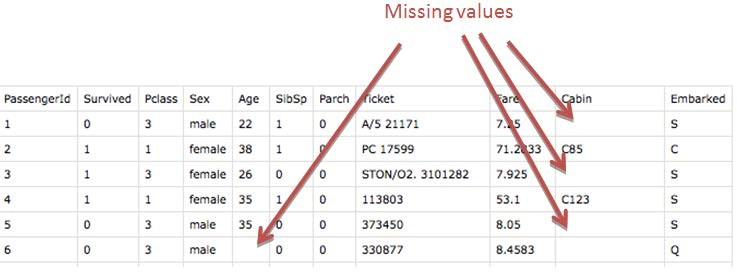

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [36]:
df.isnull().sum()

Date_YMD           0
Daily Confirmed    0
Daily Deceased     0
dtype: int64

As we notice that there are no null values in our dataset.

2. **Nan Values**

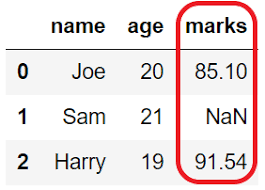

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [37]:
df.isna().sum()

Date_YMD           0
Daily Confirmed    0
Daily Deceased     0
dtype: int64

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

# Count of unique occurences of every value in all categorical value



In [38]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

Date_YMD   2020-01-30    1
2021-05-17    1
2021-05-19    1
2021-05-20    1
2021-05-21    1
             ..
2020-09-27    1
2020-09-28    1
2020-09-29    1
2020-09-30    1
2022-01-18    1
Name: Date_YMD, Length: 720, dtype: int64


- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



__Label Encoding__ refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

# Skewness 

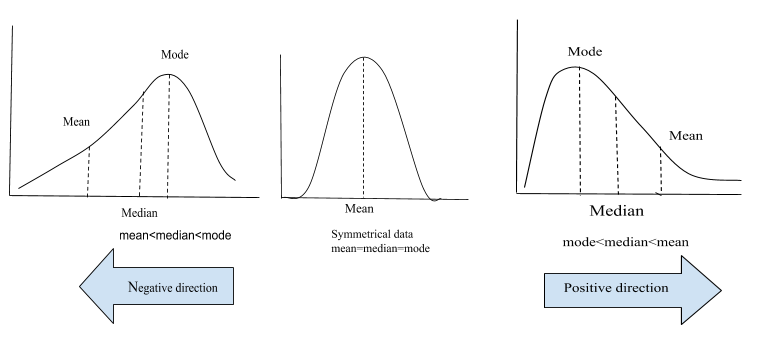

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [39]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in float64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [40]:
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [41]:
skew_df

Empty DataFrame
Columns: [column, skewness_value, skewness (+ve or -ve)]
Index: []

In [42]:
skew_total_df


positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                      0                   0                      0

We notice with the above results that we have following details:
1. All columns are positive skewed



### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

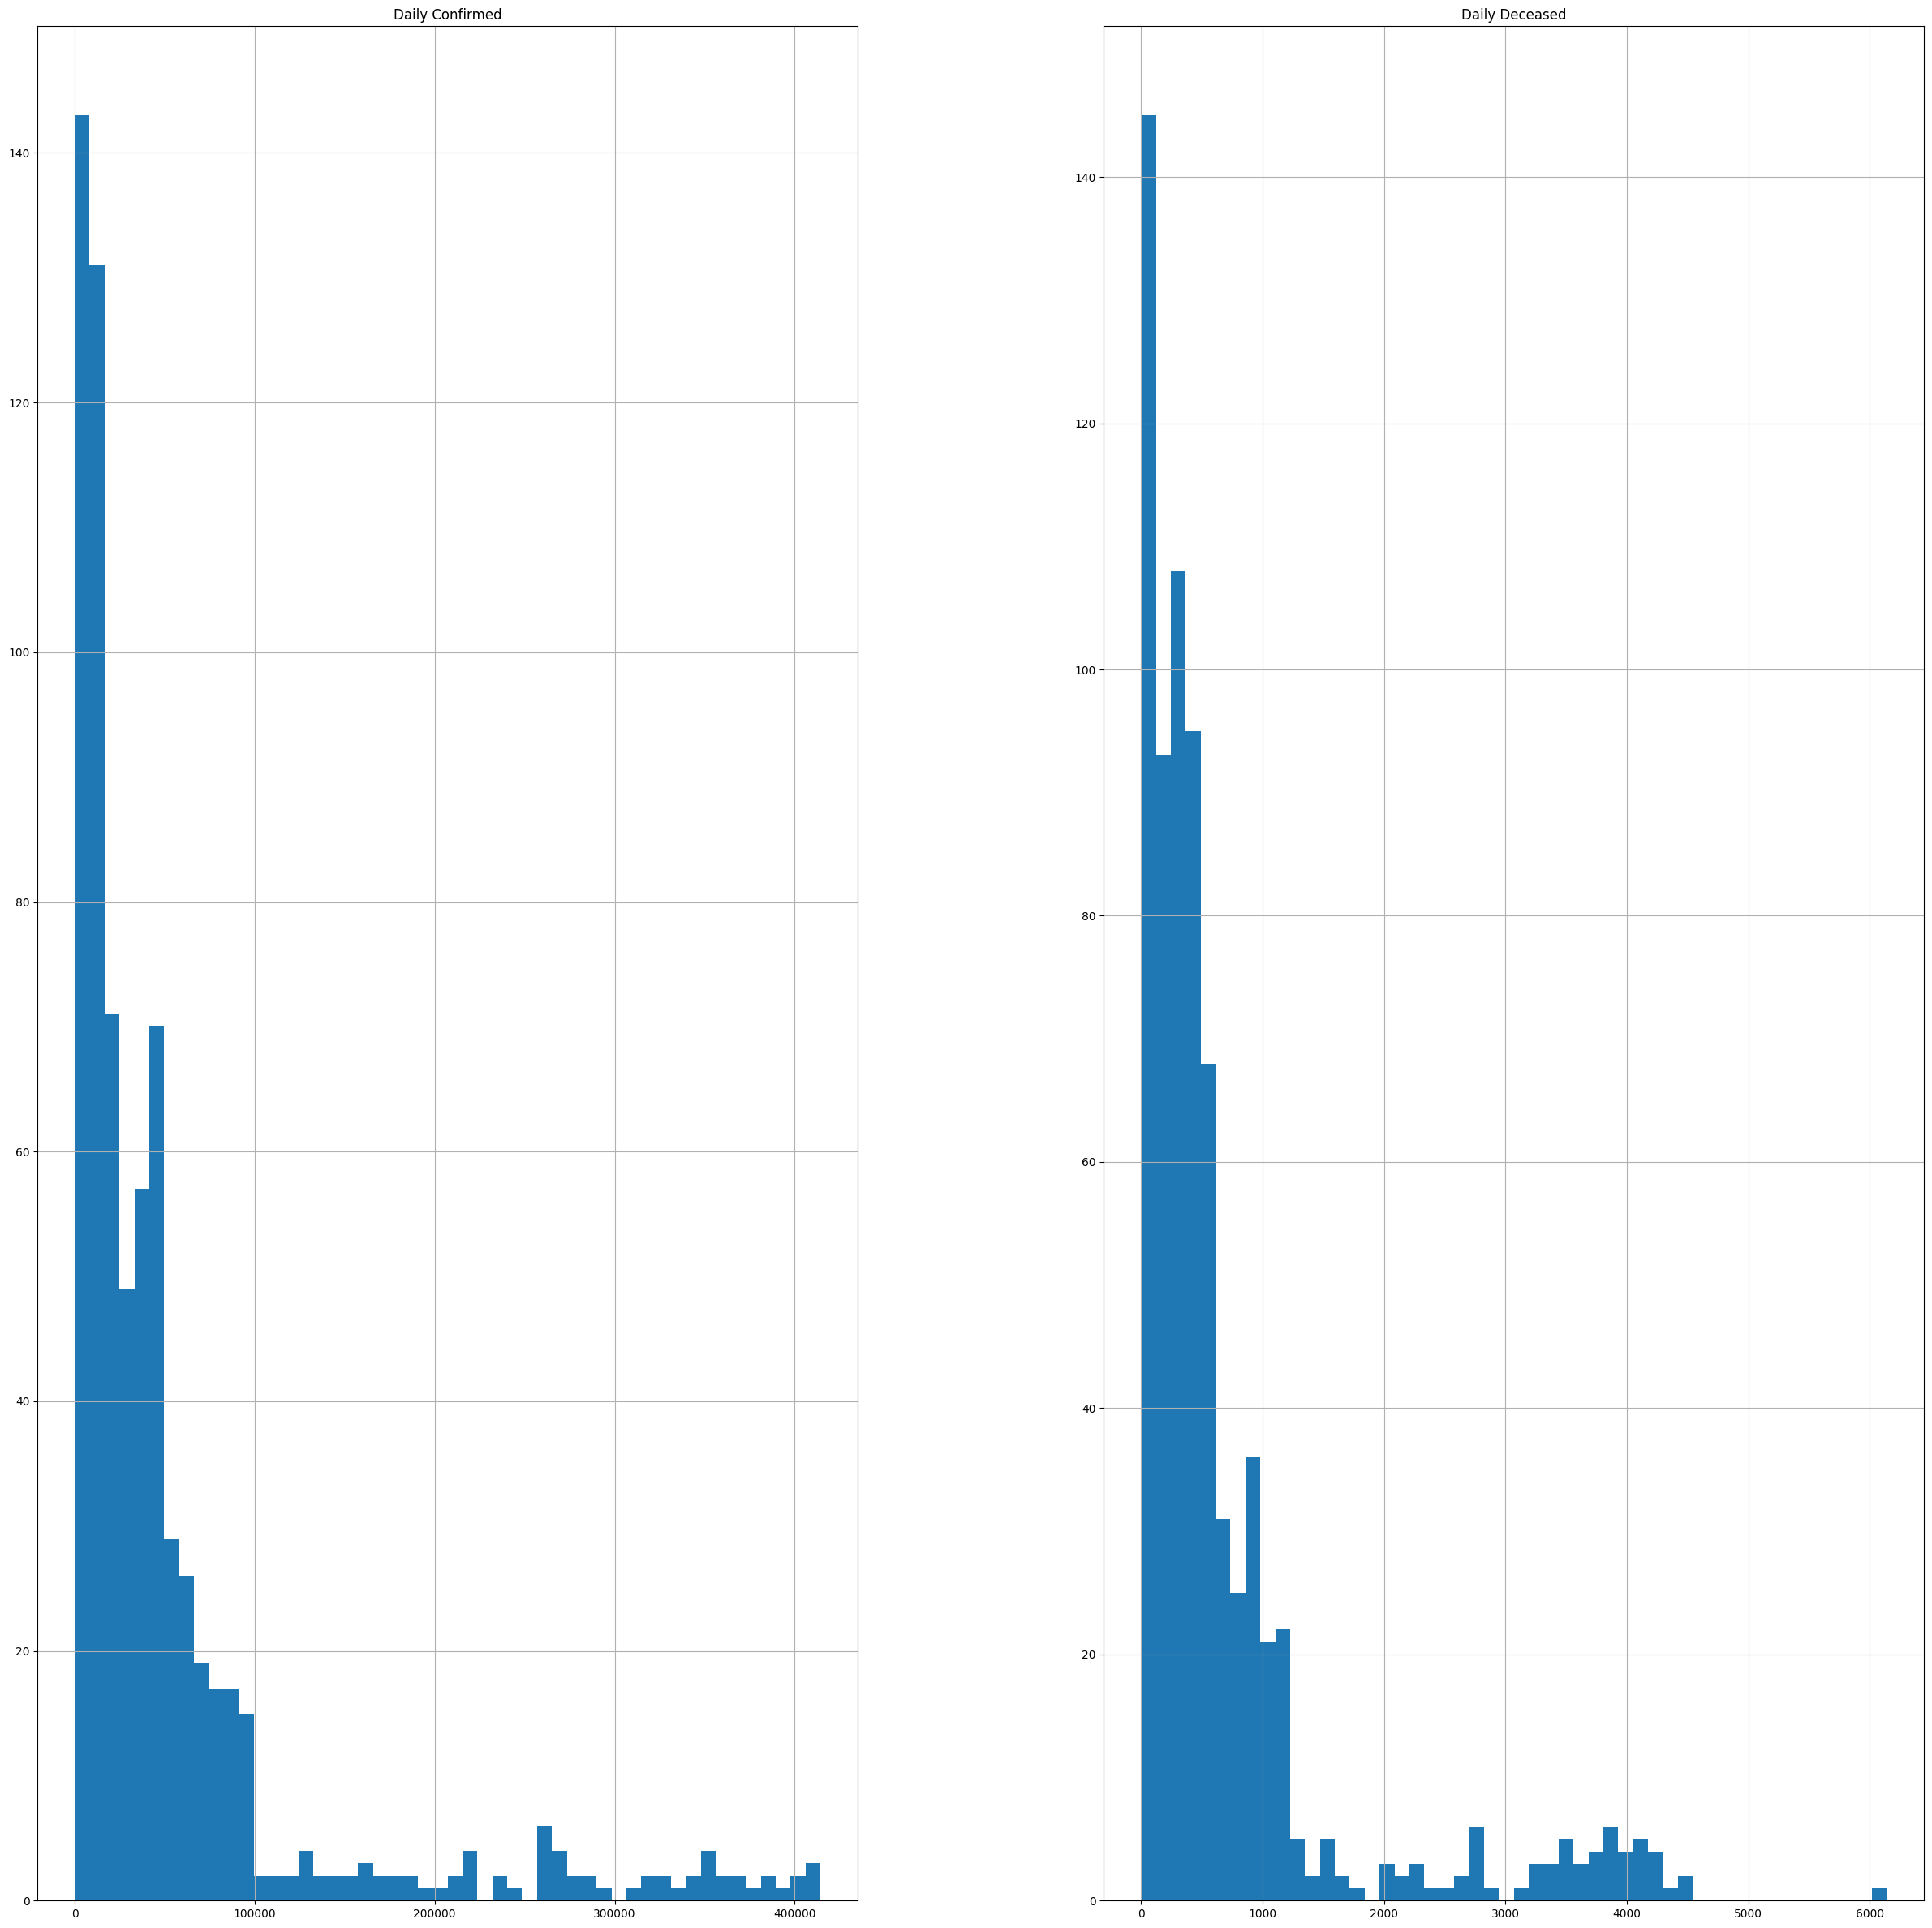

In [43]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,30))
plt.show()

In [44]:
import plotly.express as px
fig = px.bar(df, x='Date_YMD', y='Daily Confirmed')
fig.show()


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

- We can observe that the number of daily deaths were highest in between the months April 2021 to July 2021. 

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

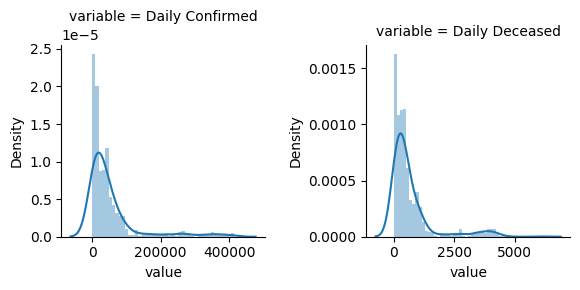

In [45]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 30 columns are positive skewed
2. 1 column is added here i.e diagnosis which is our target variable ~ which is also +ve skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [46]:
#+ve skewed 
df['Daily Deceased'].skew()

2.668553485331556

#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



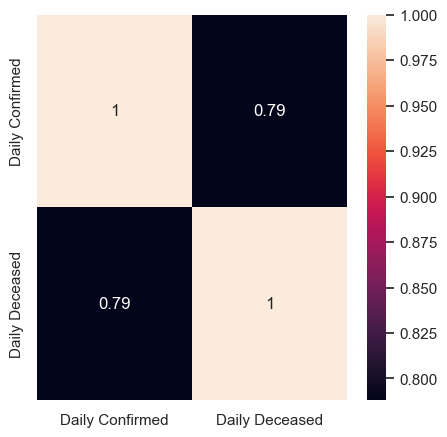

In [47]:
#correlation plot
sns.set(rc = {'figure.figsize':(5,5)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

### Notice the last column from right side of this map. We can see the correlation of all variables against diagnosis. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [48]:
corr

Daily Confirmed  Daily Deceased
Daily Confirmed         1.000000        0.788236
Daily Deceased          0.788236        1.000000

### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

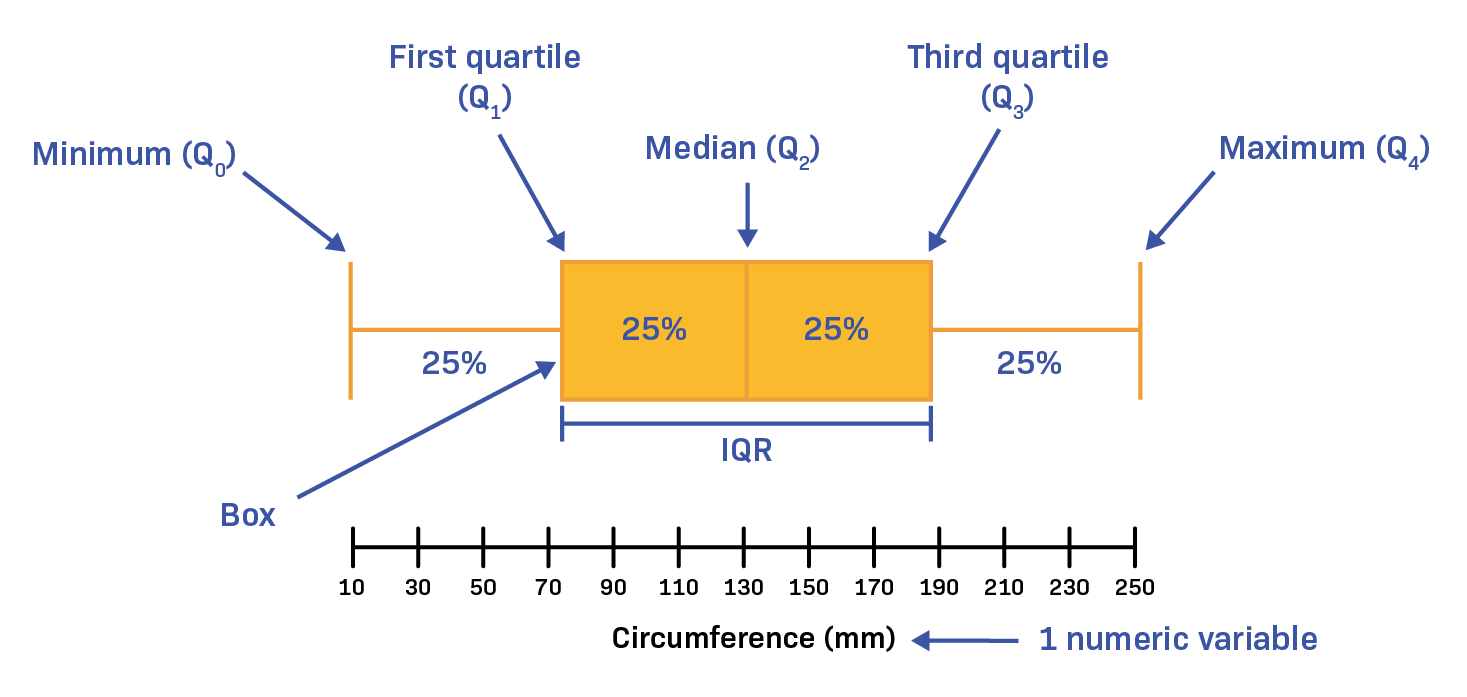

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

In [49]:
features = ['Daily Confirmed','Daily Deceased']

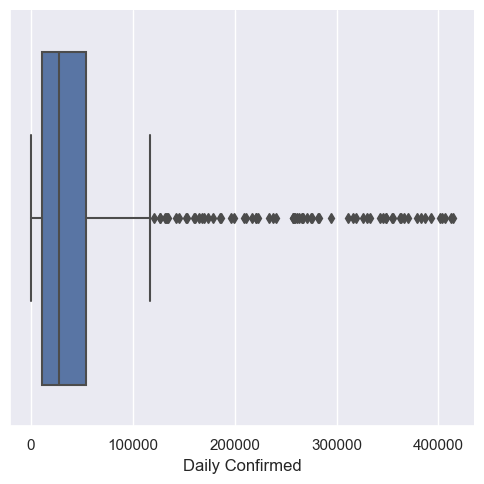

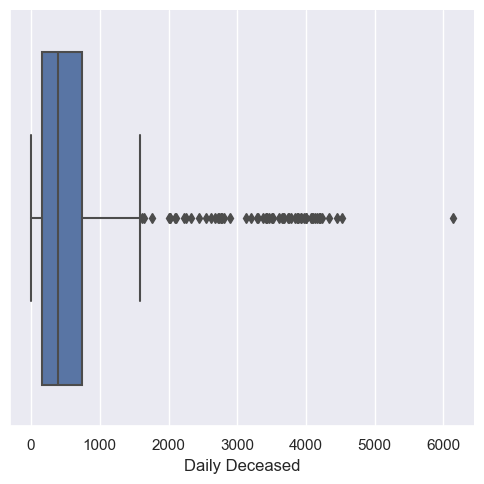

In [50]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

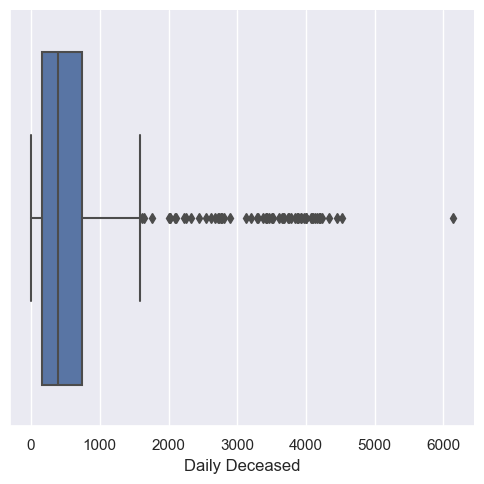

In [51]:
#for target variable
sns.catplot(data=df, x='Daily Deceased', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

As we have to predict the Daily death for the next day so we will not split the data.We will use the **autoTS** algorithm to predict a time series for the next 30 days.

# Step 3: Model Training

In [ ]:
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
model = model.fit(df, date_col="Date_YMD", value_col='Daily Deceased', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Inferred frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Model Number: 9 with model DatepartRegression in generation 0 of 10
Model Number: 10 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 10: DatepartRegression
Model Number: 11 with model ETS in generation 0 of 10
Model Number: 12 with model ETS in generation 0 of 10
Model Number: 13 with model GLM in generation 0 of 10
Model Number: 14 with model GLM in generati

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 44 with model DatepartRegression in generation 0 of 10
Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Model Number: 50 with model MultivariateMotif in generation 0 of 10
Model Number: 51 with model MultivariateMotif in generation 0 of 10
Model Number: 52 with model UnivariateMotif in generation 0 of 10
Model Number: 53 with model UnivariateMotif in generation 0 of 10
Model Number: 54 with model SectionalMotif in generation 0 of 10
Model Number: 55 with model SectionalMotif in generation 0 of 10
Model Number: 56 with model MultivariateRegression in generation 0 of 10
Model Number: 57 with model FBProphet in generation 0 of 10
Template E

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 60 with model NVAR in generation 0 of 10
Model Number: 61 with model Theta in generation 0 of 10
Model Number: 62 with model UnivariateRegression in generation 0 of 10
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 69: GLM
Model Number: 70 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Daily Deceased 

Model Number: 138 with model SeasonalNaive in generation 0 of 10
Model Number: 139 with model NVAR in generation 0 of 10
Model Number: 140 with model SeasonalNaive in generation 0 of 10
Model Number: 141 with model UnobservedComponents in generation 0 of 10
Model Number: 142 with model LastValueNaive in generation 0 of 10
Model Number: 143 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 143: VAR
Model Number: 144 with model UnivariateMotif in generation 0 of 10
Model Number: 145 with model NVAR in generation 0 of 10
Model Number: 146 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 146: VAR
Model Number: 147 with model GLS in generation 0 of 10
Model Number: 148 with model Theta in generation 0 of 10
Model Number: 149 with model UnivariateMotif in generation 0 of 10
Model Number: 150 with model UnivariateMotif in generation 0 of 10
Model Number: 151 with model Me

Model Number: 233 with model UnivariateRegression in generation 1 of 10
Model Number: 234 with model Theta in generation 1 of 10
Model Number: 235 with model ETS in generation 1 of 10
Model Number: 236 with model ARDL in generation 1 of 10
Model Number: 237 with model SeasonalNaive in generation 1 of 10
Model Number: 238 with model ARDL in generation 1 of 10
Model Number: 239 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 239: DatepartRegression
Model Number: 240 with model ConstantNaive in generation 1 of 10
Model Number: 241 with model LastValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 241: LastValueNaive
Model Number: 242 with model MultivariateMotif in generation 1 of 10
Model Number: 243 with model GLM in generation 1 of 10
Model Number: 244 with model GLS in generation 1 of 10
Model Number: 245 with model Univa

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 329 with model ETS in generation 2 of 10
Model Number: 330 with model UnivariateMotif in generation 2 of 10
Model Number: 331 with model Theta in generation 2 of 10
No anomalies detected.
Model Number: 332 with model UnivariateMotif in generation 2 of 10
Model Number: 333 with model SectionalMotif in generation 2 of 10
Model Number: 334 with model UnivariateMotif in generation 2 of 10
Model Number: 335 with model SeasonalNaive in generation 2 of 10
Model Number: 336 with model ETS in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 336: ETS
Model Number: 337 with model Theta in generation 2 of 10
Model Number: 338 with model WindowRegression in generation 2 of 10
Model Number: 339 with model MetricMotif in generation 2 of 10
Model Number: 340 with model DatepartRegression in generation 2 of 10
Model Number: 341 with model ConstantNaive in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in mode

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 412 with model ConstantNaive in generation 2 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 413 with model MultivariateMotif in generation 2 of 10
Model Number: 414 with model ARDL in generation 2 of 10
Model Number: 415 with model AverageValueNaive in generation 2 of 10
Model Number: 416 with model GLM in generation 2 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 416: GLM
Model Number: 417 with model MetricMotif in generation 2 of 10
Model Number: 418 with model ConstantNaive in generation 2 of 10
Model Number: 419 with model LastValueNaive in generation 2 of 10
Model Number: 420 with model LastValueNaive in generation 2 of 10
Model Number: 421 with model NVAR in generation 2 of 10
Model Number: 422 with model ETS in generation 2 of 10
Model Number: 423 with model MetricMotif in generation 2 of 10
Model Number: 424 with model LastValueNaive in generation 2 of 10
Model Number: 425 with model MetricMotif in generation 2 of 10
Model Number: 426 with model UnivariateMotif in generation 2 of 1

Model Number: 527 with model MultivariateMotif in generation 3 of 10
Model Number: 528 with model AverageValueNaive in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 528: AverageValueNaive
Model Number: 529 with model UnivariateMotif in generation 3 of 10
Model Number: 530 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 530: WindowRegression
Model Number: 531 with model ARIMA in generation 3 of 10
Model Number: 532 with model GLS in generation 3 of 10
Model Number: 533 with model MultivariateMotif in generation 3 of 10
Model Number: 534 with model ETS in generation 3 of 10
Model Number: 535 with model UnivariateMotif in generation 3 of 10
Model Number: 536 with model ARIMA in generation 3 of 10
Model Number: 537 with model AverageValueNaive in generation 3 of 10
Model Number: 538 with model SectionalMotif in generation 3 of 10
Model 

In [ ]:
forecast

In [ ]:
r = model.results()
v_r = model.results("validation")


In [ ]:
v_r    

In [ ]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('breast_cancer_prognosis.pkl', 'rb'))
    Diagnosis = str(list(pickled_model.predict(features)))
    
    return str(f'The diagnosis is {Diagnosis}')

#### We can test our model by giving our own parameters or features to predict. 

In [ ]:
radius_mean = 20.57
texture_mean = 17.77
smoothness_mean = 0.08474
compactness_mean = 0.07864
symmetry_mean = 0.1812
fractal_dimension_mean = 0.05667
radius_se = 0.5435
texture_se =  0.7339
smoothness_se = 0.005225
compactness_se = 0.01308
concavepoints_se = 0.0134
symmetry_se = 0.01389
symmetry_worst = 0.275

In [ ]:
model_prediction([[radius_mean, texture_mean, smoothness_mean, compactness_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, smoothness_se, compactness_se, concavepoints_se, symmetry_se, symmetry_worst]])

1 ~ M = malignant, 0 ~ B = benign

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/BreastCancerAPI

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. The above model helps in classifying the severity of the breast cancer. It helps the patient in identifying the criticalness of the breast cancer. The accuracy for the prediction is 92.68%  and it signifies the accurate prediction of the disease.  